In [160]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from tpot import TPOTRegressor
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Produce visualizations in notebook
%matplotlib inline

# See all columns in a dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Business Questions:

- Can we make a linear regression model that will accurately predict the list price of a night's stay through Airbnb in Seattle?
- What are the top amenities that should be included in a property to get the best price and what should be dropped?
- Choosing the right machine learning models is hard. Can an automatic machine learning tool using genetic programming do an equally good job right "out of the box" as the standard linear regression model chosen for this project? In other words, is it possible for a company with little background in machine learning to reap some of the benefits from the field by using auto-ml packages like TPOT?

# Data Gathering and Assessing

The next section of code will contain my data gathering and assessment of the data. The data wrangling and feature engineering will be done in a separate section.

In [161]:
# Dataset found at https://www.kaggle.com/airbnb/seattle/downloads/listings.csv
# Load datafile from Kaggle

seattle = pd.read_csv(''./data/listings.csv')
#seattle = pd.read_csv('listings.csv')

In [162]:
seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [163]:
# Number of rows and features in dataset
print("The number of rows in dataset", seattle.shape[0])
print("The number of features in dataset", seattle.shape[1])

The number of rows in dataset 3818
The number of features in dataset 92


I can see that the all the price columns have a format containing '$' and ','. I will first convert these columns to float before using the describe method to look at the data.

In [164]:
# Convert price columns
currency_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

for c in currency_columns:
    seattle[c] = seattle[c].replace( '[\$,)]','', regex=True ).astype(float)


In [165]:
# Test
seattle.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [166]:
seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,10.667627,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,532.352269,1722.267981,270.222690,48.830341,1.311040,17.585922,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,455.000000,1512.000000,150.000000,25.000000,1.000000,0.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,950.000000,3150.000000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


I'm planning on trying to predict price per night so I need to take a closer look at the price feature.

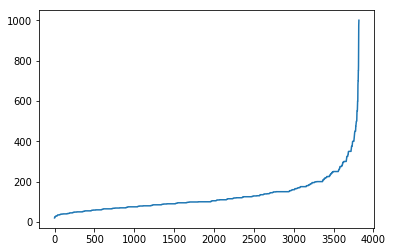

In [167]:
# Looking at price per night
seattle['price'].sort_values().reset_index(drop=True).plot();

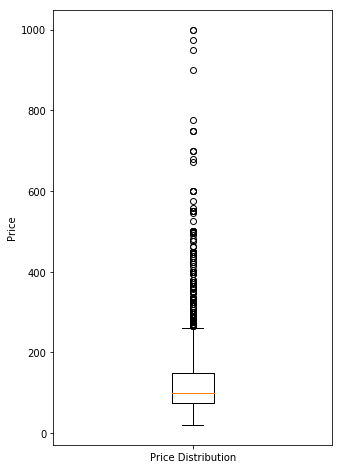

In [168]:
# Get a closer look at the price distribution with a box plot
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)
plt.ylabel('Price')
ax.boxplot(seattle['price'])
ax.set_xticklabels(['Price Distribution']);

In [169]:
seattle.neighbourhood_cleansed.unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake', 'Mann',
       'Madrona', 'University District', 'Harrison/Denny-Blaine', 'Minor',
       'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake', 'South Lake Union',
       'Lawton Park', 'Briarcliff', 'Belltown', 'International District',
       'Central Business District', 'First Hill', 'Yesler Terrace',
       'Pioneer Square', 'Gatewood', 'Arbor Heights', 'Alki',
       'North Admiral', 'Crown Hill', 'Fairmount Park', 'Genesee',
       'Interbay', 'Industrial District', 'Mid-Beacon Hill',
       'South Beacon Hill', 'Greenwood', 'Holly Park', 'Fauntleroy',
       'North Beacon Hill', 'Mount Baker', 'Brighton', 'South Delridge',
       'View Ridge', 'Dunlap', 'Rainier Beach', 'Columbia City',
       'Seward Park', 'North Delridge', 'Maple Leaf', 'Ravenna',
       'Riverview', 'Portage Bay', 'Bryant', 'Montlake', 'Broadway',
       'Loyal Heights', 'Vict

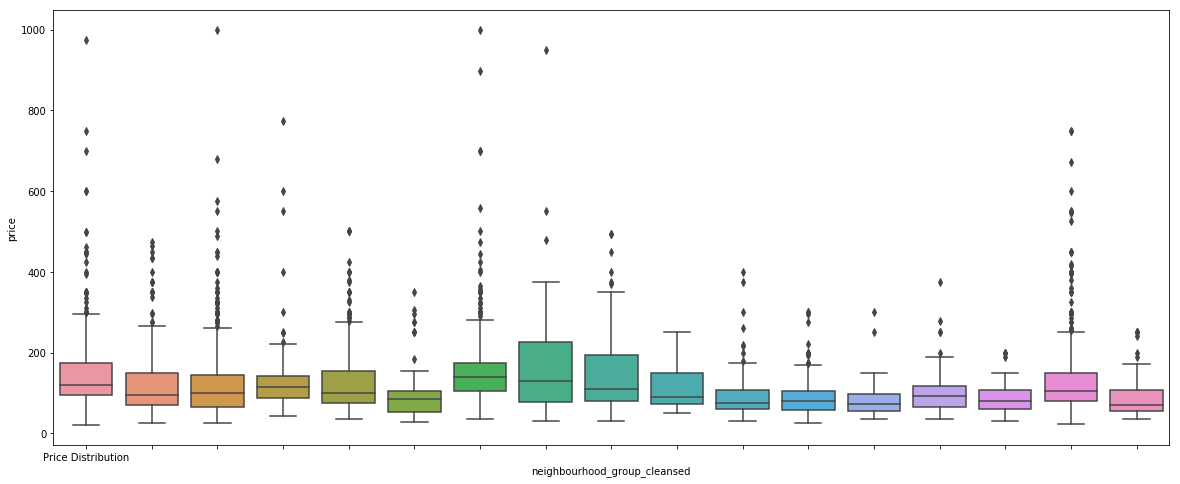

In [170]:
# A quick look at the different neighbourhoods without caring about the specifics
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.ylabel('Price')
sns.boxplot(y='price', x='neighbourhood_group_cleansed', data=seattle)
ax.set_xticklabels(['Price Distribution']);

The median price is fairly similar but the range differs widely

In [171]:
price_range = [500, 550, 600, 650, 700, 800, 900]

for i in price_range:
    print("There are", seattle[seattle.price > i].shape[0], "prices greater than", i)

There are 27 prices greater than 500
There are 20 prices greater than 550
There are 14 prices greater than 600
There are 14 prices greater than 650
There are 9 prices greater than 700
There are 5 prices greater than 800
There are 4 prices greater than 900


We see that price per night range from USD 20 to 1000. My initial reaction was thinking that the most expensive properties could be fake listings, but then I saw that they had all gotten reviews so they must just be really nice and/or large properties for rent.
My initial instinct was to remove the outliers by making a cutoff at a price of USD 600, thinking they would skew the dataset too much and reduce the quality of the predictive model. However, doing that reduced the r-squared in the linear regression model by about 9 percentage points so I kept all the pricing data.

In [172]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [173]:
# Find missing values per column and their proportion
# Function found at # https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
# and then modified to include an optional plot

def missing_values_table(df, plot):
    """"
    Purpose: This function takes a dataframe and a boolean and returns
    a table showing the number of missing values per column and their proportion.
    The optional plot shows the columns and their respective proportion of missing
    values sorted in descending order.
    
    Input: 
    1. Dataframe
    2. Boolean - True/False where True will give you a plot
    
    Output:
    1. A table showing the number of missing values per column and their proportion
    2. If True: A plot showing the columns and their respective proportion of missing
    values sorted in descending order.
    """"
    
    
    
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")
    
    if plot:
        plt.figure(figsize=(20,8))
        (df.isnull().sum(axis = 0).sort_values(ascending=False)[:mis_val_table_ren_columns.shape[0]]/len(df)*100).plot(kind='bar', facecolor='b');
        plt.title('Proportion of missing values per feature')
        plt.ylabel('% of missing values')
        plt.xlabel("Features");
    
#     plt.figure(figsize=(18,8))
#     mis_val_percent.sort_values(ascending=False).plot.bar(facecolor='b')
#     plt.xlabel('Feature names')
#     plt.ylabel('% of missing values')
#     plt.title('Proportion of missing values per feature')
#     plt.show()
    
    return mis_val_table_ren_columns

Your selected dataframe has 92 columns.
There are 45 columns that have missing values.


,Missing Values,% of Total Values
license,3818,100.0
square_feet,3721,97.5
monthly_price,2301,60.3
security_deposit,1952,51.1
weekly_price,1809,47.4
notes,1606,42.1
neighborhood_overview,1032,27.0
cleaning_fee,1030,27.0
transit,934,24.5
host_about,859,22.5


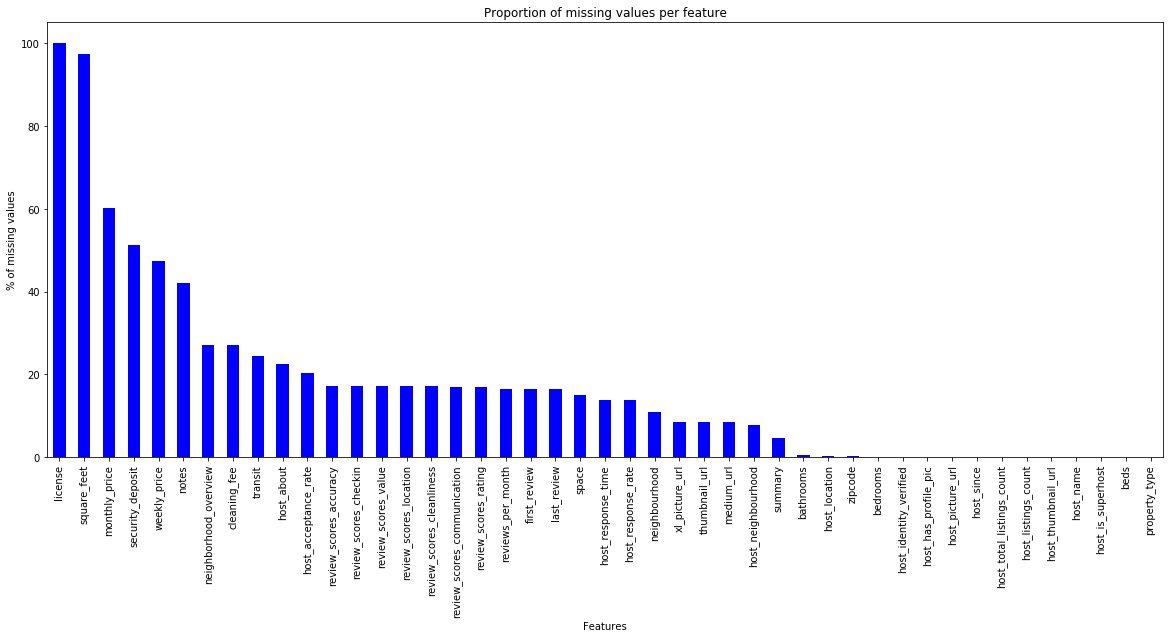

In [174]:
# Number of missing values per column in tabular and graph form
missing_values_table(seattle, True)

In [175]:
# Number of missing values per column - top 10
missing_values_table(seattle, False)[:10]

Your selected dataframe has 92 columns.
There are 45 columns that have missing values.


,Missing Values,% of Total Values
license,3818,100.0
square_feet,3721,97.5
monthly_price,2301,60.3
security_deposit,1952,51.1
weekly_price,1809,47.4
notes,1606,42.1
neighborhood_overview,1032,27.0
cleaning_fee,1030,27.0
transit,934,24.5
host_about,859,22.5


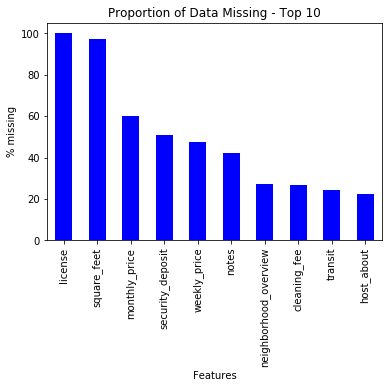

In [176]:
(seattle.isnull().sum(axis = 0).sort_values(ascending=False)[:10]/len(seattle)*100).plot(kind='bar', facecolor='b');
plt.title("Proportion of Data Missing - Top 10")
plt.ylabel("% missing")
plt.xlabel("Features");

We see two features, license and square_feet, that have close to 100 % missing values. It will not be possible to estimate these two so they will be dropped from the dataset in the next section.

#### Looking at categorical variables

In [177]:
# Find all the features that are categorical variables
seattle.select_dtypes(include=['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       'first_review', 'last_review', 'requires_license', 'jurisdiction_names',
       'instant_boo

In [178]:
seattle.city.unique()

array(['Seattle', 'Ballard, Seattle', 'West Seattle', 'Seattle ', '西雅图',
       'Phinney Ridge Seattle', 'seattle'], dtype=object)

In [179]:
seattle.market.unique()

array(['Seattle'], dtype=object)

In [180]:
# Check to see which one of neighbourhood_cleansed and neighbourhood_group_cleansed
# we should keep
len(seattle.neighbourhood_cleansed.unique())

87

In [181]:
len(seattle.neighbourhood_group_cleansed.unique())

17

I'll keep the feature neighbourhood_group_cleansed to keep the number of dummy variables down

In [182]:
seattle[seattle['zipcode'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
162,2039149,https://www.airbnb.com/rooms/2039149,20160104002432,2016-01-04,Walkable Seattle 3-bedroom Home,"Clean home in wonderful, family-friendly locat...","Clean and upscale home in wonderful, family-fr...","Clean home in wonderful, family-friendly locat...",none,Ballard Avenue's modest commercial buildings f...,There is a small bbq out back on the patio wit...,Public transit is plentiful in this part of Se...,NaN,NaN,https://a2.muscache.com/ac/pictures/28609196/6...,NaN,5325329,https://www.airbnb.com/users/show/5325329,Blair,2013-03-04,"Seattle, Washington, United States",My name is Blair and I'm glad you are interest...,within a few hours,97%,100%,f,https://a0.muscache.com/ac/users/5325329/profi...,https://a0.muscache.com/ac/users/5325329/profi...,Queen Anne,9.0,9.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"Seattle, WA, United States",Ballard,West Woodland,Ballard,Seattle,WA,NaN,Seattle,"Seattle, WA",US,United States,47.666868,-122.364031,t,House,Entire home/apt,10,2.0,3.0,3.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,225.0,NaN,NaN,300.0,100.0,8,40.0,1,90,today,t,17,42,58,124,2016-01-04,121,2014-01-30,2015-12-21,91.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,WASHINGTON,t,strict,f,f,8,5.15
479,610989,https://www.airbnb.com/rooms/610989,20160104002432,2016-01-04,Inn of Twin Gables - North Room,NaN,"An elegant choice, our largest room within thi...","An elegant choice, our largest room within thi...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/7737688/cc...,https://a2.muscache.com/im/pictures/7737688/cc...,https://a2.muscache.com/ac/pictures/7737688/cc...,https://a2.muscache.com/ac/pictures/7737688/cc...,3029318,https://www.airbnb.com/users/show/3029318,Katie,2012-07-23,"Seattle, Washington, United States",I grew up in California and was in the cruise ...,NaN,NaN,NaN,f,https://a1.muscache.com/ac/users/3029318/profi...,https://a1.muscache.com/ac/users/3029318/profi...,Queen Anne,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"14th Avenue West, Seattle, WA, United States",Queen Anne,North Queen Anne,Queen Anne,Seattle,WA,NaN,Seattle,"Seattle, WA",US,United States,47.649393,-122.375584,t,Bed & Breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,209.0,1300.0,NaN,NaN,NaN,1,0.0,2,1125,2 months ago,t,0,0,0,2,2016-01-04,1,2013-09-16,2013-09-16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.04
988,4172364,https://www.airbnb.com/rooms/4172364,20160104002432,2016-01-04,Blue Room,This newly refinished Blue Room has everything...,This room was built for in

City contains different names. I'm guessing that some of them are refering to particular parts of the city while others are just typos. Since the dataset only covers Airbnb in Seattle we can remove any columns related to city, state or country.

There are seven listings missing zip codes. Because several neighborhoods are listed with two different zipcodes it is difficult to impute these. One alternative could be to just drop these 7 listings but I will instead remove this column.

The features covering neighborhoods will be a proxy for zipcodes. The assumption is that the variability in price within a neighborhood is more dependent on the property itself and not the particular zipcode within a neighborhood. This is probably not 100 % correct but should be good enough for this analysis.

In [183]:
seattle.amenities.unique()

array([ '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}',
       '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}',
       '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}',
       ...,
       '{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),Cat(s),Heating,Washer,Dryer,"Smoke Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}',
       '{TV,"Wireless 

I had initially decided to include only four of the amenities in the analysis. These were TV/Cable TV, Internet/Wireless Internet, Shampoo and whether or not there is an elevator in the building. I was including Shampoo because I'm genuinely curious to see if that really is a factor when choosing a place to stay given how inexpensive the product is.

It could be argued that Internet and Wireless Internet is not exactly the same thing if one means you need a cable to get online but I have chosen to treat these as the same amenity since I can't tell for sure that every person creating a listing had these two separate in their minds. The same goes for TV and Cable TV.

**In the end, based on the first regression run, I decided to keep all the different types of amenities in the analysis.**

In [184]:
# Looking at categorical features regarding how "difficult" it is to make a booking as a customer
# to see the possible variables.
print('requires_license:' ,seattle.requires_license.unique())
print('cancellation_policy:', seattle.cancellation_policy.unique())
print('require_guest_profile_picture:', seattle.require_guest_profile_picture.unique())
print('require_guest_phone_verification:', seattle.require_guest_phone_verification.unique())

requires_license: ['f']
cancellation_policy: ['moderate' 'strict' 'flexible']
require_guest_profile_picture: ['f' 't']
require_guest_phone_verification: ['f' 't']


Based on the assessment I have decided on dropping the majority of features in the original dataset. I'm mainly keeping features that describe the properties for rent and their amenities in this analysis.

# Data Wrangling and Feature Engineering

The following section will contain all the data wrangling and feature engineering.

In [185]:
# Create a clean dataset
seattle_cleaned = seattle.copy()

#### Time to drop some features
I will drop these in several steps in case I decide to go back and include more features in the model in the future.

In [186]:
# Drop the two features with the most missing values
seattle_cleaned.drop(['license', 'square_feet'], axis=1, inplace=True)

In [187]:
# Drop features containing prices for weekly and monthly stays
seattle_cleaned.drop(['weekly_price', 'monthly_price'], axis=1, inplace=True)

In [188]:
# seattle.amenities = seattle.amenities.str.replace("[{}]", "") 
# test = seattle.amenities.str.get_dummies(sep = ",")

In [189]:
# Drop a large chunk of the features as explained in the first section
seattle_cleaned.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
                     'experiences_offered', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                     'xl_picture_url', 'host_url', 'host_name', 'state', 'market', 'country_code', 'country',
                     'latitude', 'longitude', 'has_availability', 'calendar_last_scraped', 'jurisdiction_names',
                     'host_location','host_about', 'host_thumbnail_url','host_picture_url'], axis=1, inplace=True)

In [190]:
seattle_cleaned.drop(['neighborhood_overview', 'host_id', 'host_since', 'host_acceptance_rate', 'host_neighbourhood',
                     'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
                     'street',  'neighbourhood', 'zipcode', 'smart_location', 'is_location_exact', 'maximum_nights',
                     'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
                     'first_review', 'last_review', 'requires_license', 'instant_bookable', 'calculated_host_listings_count',
                     'reviews_per_month'], axis=1, inplace=True)

In [191]:
# review_scores_rating is likely a combination of the other review scores so no need to keep them all.
# In a future it would have been interesting to see if one type of review score is more important than others
seattle_cleaned.drop(['host_response_time','host_response_rate', 'neighbourhood_cleansed', 'city', 'security_deposit', 'cleaning_fee',
                     'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location', 'review_scores_value',
                     ], axis=1, inplace=True)

In [192]:
# Check
seattle_cleaned.head(1)

,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,f,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,5.0,1,207,95.0,moderate,f,f


Your selected dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
review_scores_rating,647,16.9
bathrooms,16,0.4
bedrooms,6,0.2
host_is_superhost,2,0.1
host_identity_verified,2,0.1
property_type,1,0.0
beds,1,0.0


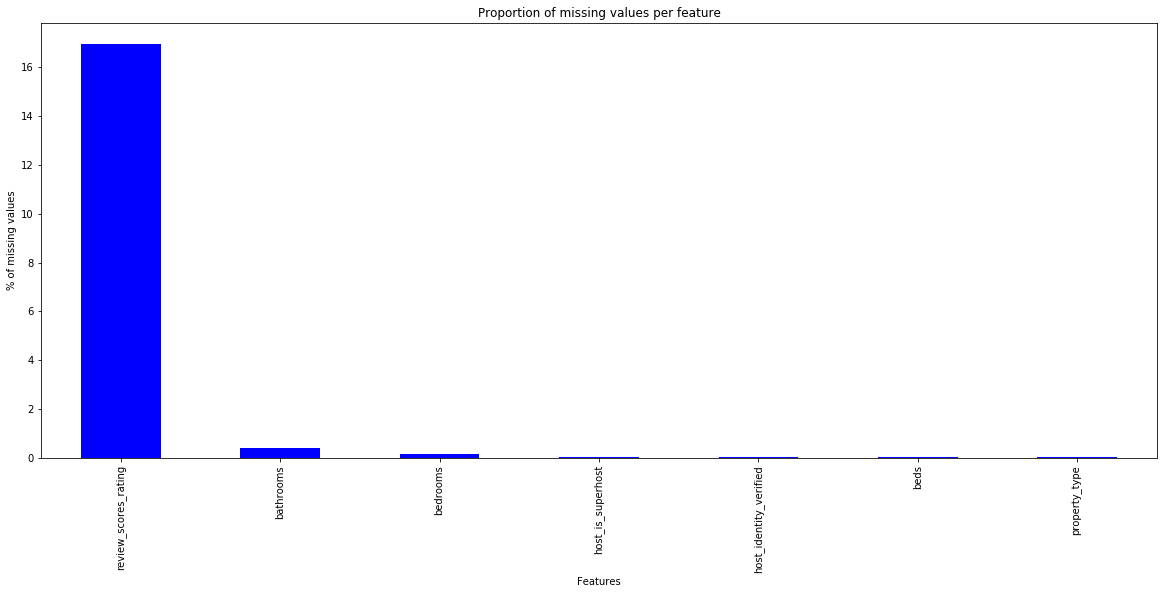

In [193]:
# Look for missing values in the remaining features
missing_values_table(seattle_cleaned, True)

In [194]:
# See how many of the remaining features are categorical variables
seattle_cleaned.select_dtypes(include=['object']).columns

Index(['host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bed_type', 'amenities', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [195]:
# Look at the possible values of the remaining categorical features except for amenities
categoricals = ['host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification']
print("The remaining categoricals have these available variables:")
print('-'*58)
for i in categoricals:
    print(i,":", seattle_cleaned[i].unique(), "\n")

The remaining categoricals have these available variables:
----------------------------------------------------------
host_is_superhost : ['f' 't' nan] 

host_identity_verified : ['t' 'f' nan] 

neighbourhood_group_cleansed : ['Queen Anne' 'Ballard' 'Other neighborhoods' 'Cascade' 'Central Area'
 'University District' 'Downtown' 'Magnolia' 'West Seattle' 'Interbay'
 'Beacon Hill' 'Rainier Valley' 'Delridge' 'Seward Park' 'Northgate'
 'Capitol Hill' 'Lake City'] 

property_type : ['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakfast' 'Other' 'Dorm' 'Treehouse'
 'Yurt' 'Chalet' 'Tent' nan] 

room_type : ['Entire home/apt' 'Private room' 'Shared room'] 

bed_type : ['Real Bed' 'Futon' 'Pull-out Sofa' 'Airbed' 'Couch'] 

cancellation_policy : ['moderate' 'strict' 'flexible'] 

require_guest_profile_picture : ['f' 't'] 

require_guest_phone_verification : ['f' 't'] 



#### Convert to True and False

In [196]:
# Need to convert the categoricals with 't' and 'f' to True and False
for cats in ['host_is_superhost', 'host_identity_verified', 'require_guest_profile_picture', 'require_guest_phone_verification']:
    seattle_cleaned[cats] = seattle[cats].map(lambda x: True if x == 't' else False)

In [197]:
# Test
categoricals = ['host_is_superhost', 'host_identity_verified',
              'require_guest_profile_picture', 'require_guest_phone_verification']
print("The new variables:")
print('-'*18)
for i in categoricals:
    print(i,":", seattle_cleaned[i].unique(), "\n")

The new variables:
------------------
host_is_superhost : [False  True] 

host_identity_verified : [ True False] 

require_guest_profile_picture : [False  True] 

require_guest_phone_verification : [False  True] 



#### Time to impute some values


In [198]:
# I'll start by imputing the missing values for the categoricals 'host_is_superhost', 'host_identity_verified' and property_type.
# The dataset is only missing one or two values for each of these so it won't mean much even if we assign the wrong values.
# I'll use the mode for these three features.
# Note: Looking up the missing property on Google Maps implies that is is a house but since the street address and
# latitude/longitude pointed to two different properties I'll just go with mode.

cols = ['host_is_superhost', 'host_identity_verified', 'property_type']
seattle_cleaned[cols]=seattle_cleaned[cols].fillna(seattle_cleaned.mode().iloc[0])

For the remaining 4 features with missing values I'll use the median. Almost 17 % of the review_scores_rating are missing.
It might be possible to use a form of clustering to make a better estimate for this feature by looking at
the other review scores for the same listing in the cases where these aren't missing. But for this project I'll
use the median.
For the rest of the features the number of missing values are so few that will it not make much difference.

In [199]:
# Impute using median
for colu in seattle_cleaned.columns[seattle_cleaned.isnull().any()]:
    seattle_cleaned[colu] = seattle_cleaned[colu].fillna(seattle_cleaned[colu].median())

In [200]:
# Test that we no longer have missing values
seattle_cleaned.isnull().sum().sort_values(ascending=False)

require_guest_phone_verification    0
require_guest_profile_picture       0
host_identity_verified              0
neighbourhood_group_cleansed        0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
number_of_reviews                   0
review_scores_rating                0
cancellation_policy                 0
host_is_superhost                   0
dtype: int64

#### Time to create dummy variables

I'll use Pandas' onehot encoder to convert neighbourhood_group_cleansed, property_type,	room_type bed_type and cancellation_policy into dummy variables

In [201]:
seattle_cleaned = pd.get_dummies(data=seattle_cleaned, columns=['neighbourhood_group_cleansed', 'property_type', 'room_type',
                                                                'bed_type', 'cancellation_policy'])

In [202]:
seattle_cleaned.head()


,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,require_guest_profile_picture,require_guest_phone_verification,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,False,True,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,5.0,1,207,95.0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,True,True,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1,0.0,2,43,96.0,True,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,False,True,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,10,25.0,4,20,97.0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,False,True,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,1,0.0,1,0,96.0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,False,True,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,6,15.0,1,38,92.0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [203]:
# Convert amenities to dummy variables

In [204]:
seattle_cleaned.amenities = seattle_cleaned.amenities.str.replace("[{}]", "") 
amenities_converted = seattle_cleaned.amenities.str.get_dummies(sep = ",")
seattle_done = pd.merge(seattle_cleaned, amenities_converted, left_index=True, right_index=True)

In [205]:
# Can drop the amenities column now that is has been onehot encoded
seattle_done.drop(['amenities'], axis=1, inplace = True)

In [206]:
# This is kept in the notebook in case I want to do some other analysis in the future
# Remove all listings with a price higher than 600. Should be 3804 rows left
# seattle_done.drop(seattle_done[seattle_done.price > 600].index, inplace = True)

In [207]:
# Control
seattle_done.shape

(3818, 99)

In [208]:
seattle_done.head()

,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,require_guest_profile_picture,require_guest_phone_verification,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,"""24-Hour Check-in""","""Air Conditioning""","""Buzzer/Wireless Intercom""","""Cable TV""","""Carbon Monoxide Detector""","""Elevator in Building""","""Family/Kid Friendly""","""Fire Extinguisher""","""First Aid Kit""","""Free Parking on Premises""","""Hair Dryer""","""Hot Tub""","""Indoor Fireplace""","""Laptop Friendly Workspace""","""Lock on Bedroom Door""","""Other pet(s)""","""Pets Allowed""","""Pets live on this property""","""Safety Card""","""Smoke Detector""","""Smoking Allowed""","""Suitable for Events""","""Washer / Dryer""","""Wheelchair Accessible""","""Wireless Internet""",Breakfast,Cat(s),Dog(s),Doorman,Dryer,Essentials,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,False,True,4,1.0,1.0,1.0,85.0,2,5.0,1,207,95.0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1
1,True,True,4,1.0,1.0,1.0,150.0,1,0.0,2,43,96.0,True,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,1
2,False,True,11,4.5,5.0,7.0,975.0,10,25.0,4,20,97.0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1,1,1
3,False,True,3,1.0,0.0,2.0,100.0,1,0.0,1,0,96.0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1
4,False,True,6,2.0,3.0,3.0,450.0,6,15.0,1,38,92.0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0


In [209]:
# # Create a column denoting whether or not a TV is available. We get a '0' if no TV is mentioned, or the feature contains an
# # empty value, othervwise we get a 1. 
# seattle_cleaned['tv_available'] = pd.np.where((seattle.amenities.str.contains("TV")) |
#                                     (seattle.amenities.str.contains("Cable TV")), 1,0)                   

In [210]:
# # Create a column denoting whether or not a TV is available. We get a '0' if no Internet is mentioned, or the feature contains an
# # empty value, othervwise we get a 1. 
# seattle_cleaned['internet_available'] = pd.np.where(seattle.amenities.str.contains("Internet"), 1,0)

In [211]:
# # Create a column denoting whether or not a TV is available. We get a '0' if no Internet is mentioned, or the feature contains an
# # empty value, othervwise we get a 1. 
# seattle_cleaned['shampoo_available'] = pd.np.where(seattle.amenities.str.contains("Shampoo"), 1,0)

In [212]:
# # Create a column denoting whether or not a TV is available. We get a '0' if no Internet is mentioned, or the feature contains an
# # empty value, othervwise we get a 1. 
# seattle_cleaned['elevator_available'] = pd.np.where(seattle.amenities.str.contains("Elevator"), 1,0)

In [213]:
# seattle_done = seattle_cleaned.copy()
# seattle_done.drop(['amenities'], axis=1, inplace = True)

# Modeling

I will be using linear regression to create a model for predicting the price of a night stay with Airbnb in Seattle.

In [214]:
# I'll start with creating two datasets. One that has been standardized and one that hasn't.
# Reason for creating two sets is for later testing using TPOT
standardizer = StandardScaler()
seattle_done_unstandardized = seattle_done.copy()
seattle_done[seattle_done.columns] = standardizer.fit_transform(seattle_done[seattle_done.columns])

#### Linear Regression

I will be using linear regression to create a model for predicting the price of a night stay with Airbnb in Seattle.

First we fit the model and generate predictions using the unstandardized variables

In [215]:
X = seattle_done_unstandardized.drop(['price'], axis = 1)
y = seattle_done_unstandardized.price


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [217]:
# Check the datasets
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(2672, 98) (2672,)
(1146, 98) (1146,)


In [218]:
# Fit and predict

In [219]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [220]:
# Check how good the model is by calculating r-squared on the test set
print("The r-squared for the model is:", r2_score(y_test, y_pred))

The r-squared for the model is: 0.601956954758


In [221]:
# We calculate the root mean squared error to see how wrong the model is on average
print(np.sqrt(mean_squared_error(y_test, y_pred)))

58.3837405143


In [222]:
# Calculate the model score
print('Score:', model.score(X_test, y_test))

Score: 0.601956954758


This means that the features in the model explains about 60 % of the list price and that it is on average wrong with about 58 dollars. I had hoped for an r-squared of at least 70 % and the lower score might be due to removing too many features.

#### Model Coefficients

The coefficients will be used to answer question 2.

In [223]:
coefficients = list(zip(model.coef_, X))
coefficients

[(8.2888171005730804, 'host_is_superhost'),
 (-3.1369960873874279, 'host_identity_verified'),
 (9.4826258013074707, 'accommodates'),
 (26.958786473854708, 'bathrooms'),
 (30.272686629848753, 'bedrooms'),
 (-0.14748588702479459, 'beds'),
 (2.5364952258573545, 'guests_included'),
 (0.11003025449617176, 'extra_people'),
 (7.3886765914465968e-05, 'minimum_nights'),
 (-0.14697469771545002, 'number_of_reviews'),
 (0.50075091819421402, 'review_scores_rating'),
 (5.0202462032355122, 'require_guest_profile_picture'),
 (-2.9489546775437083, 'require_guest_phone_verification'),
 (0.16224473288056318, 'neighbourhood_group_cleansed_Ballard'),
 (-12.778689792191903, 'neighbourhood_group_cleansed_Beacon Hill'),
 (24.220968352898385, 'neighbourhood_group_cleansed_Capitol Hill'),
 (29.020622947833516, 'neighbourhood_group_cleansed_Cascade'),
 (-0.10776793960681896, 'neighbourhood_group_cleansed_Central Area'),
 (-15.711537616168782, 'neighbourhood_group_cleansed_Delridge'),
 (30.982864570821764, 'neigh

In [243]:
# Convert the coefficients into a DataFrame for further analysis
coeff = pd.DataFrame(coefficients, columns=['coefficients', 'variables']).sort_values(by=['coefficients'])
coeff


,coefficients,variables
38,-60.790462,property_type_Dorm
42,-51.702874,property_type_Tent
48,-35.703633,room_type_Shared room
23,-31.539903,neighbourhood_group_cleansed_Northgate
41,-23.494779,property_type_Other
26,-22.189849,neighbourhood_group_cleansed_Rainier Valley
20,-18.449661,neighbourhood_group_cleansed_Interbay
30,-16.462408,property_type_Apartment
18,-15.711538,neighbourhood_group_cleansed_Delridge
79,-14.440645,"""Washer / Dryer"""


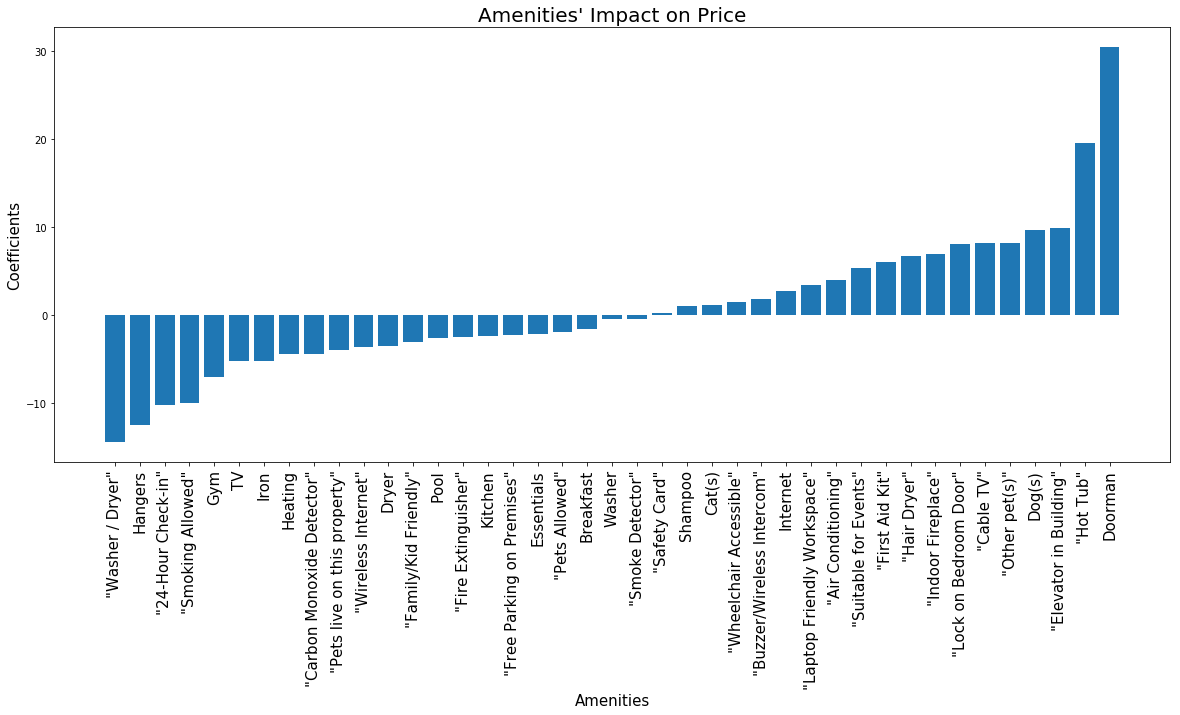

In [260]:
# Look at the coefficients for the amenities

amenities_list = amenities_converted.columns
coeff2 = coeff[coeff['variables'].isin(amenities_list)]
coeff2
plt.figure(figsize=(20,8))
plt.bar(coeff2['variables'], coeff2['coefficients'])
plt.xticks(rotation=90, fontsize=15)
plt.title("Amenities' Impact on Price", fontsize=20)
plt.ylabel('Coefficients', fontsize=15)
plt.xlabel("Amenities", fontsize=15);

In [251]:
# Look at the coefficients for the neighborhoods
# First create a DataFrame with the data we want

neighborhoods = coeff[coeff['variables'].str.contains('neighbourhood_group_cleansed_')]
neighborhoods['neighborhood'] = neighborhoods['variables'].replace('neighbourhood_group_cleansed_', "", regex=True)
neighborhoods.drop(['variables'], axis = 1, inplace=True)

C:\Users\defon\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\defon\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


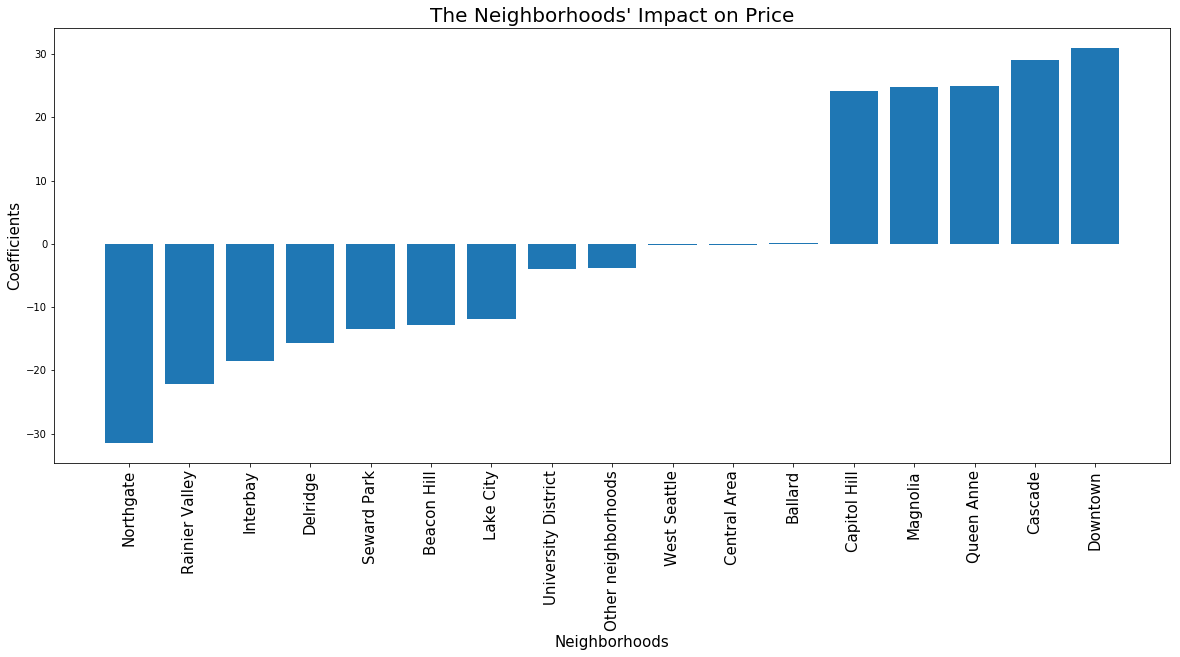

In [257]:
# Graph the relationships between the coefficients and neighborhoods
plt.figure(figsize=(20,8))
plt.bar(neighborhoods['neighborhood'], neighborhoods['coefficients'])
plt.xticks(rotation=90, fontsize=15)
plt.title("The Neighborhoods' Impact on Price", fontsize=20)
plt.ylabel('Coefficients', fontsize=15)
plt.xlabel("Neighborhoods", fontsize=15);

## Question 1: Can we make a linear regression model that will accurately predict the list price of a night's stay through Airbnb in Seattle?

Yes, it is possible to create a linear regression model that will predict the list price of a night's stay through Airbnb in Seattle. The challenge is to make the model accurate enough to be useful. In my case the r-squared implied that the features included in the model was able to explain about 60 % of the list price. This is probably not good enough to be implemented as a core model in a real estate business. However, knowing how quickly the model was created I'm confident we could create a better linear regression model given we had enough time to really test a wide range of features.
Even if the model only explained 60 % it was still a useful exercise in determining amenities that it pays of to include and which ones a host can skip.

## Question 2: What are the top amenities that should be included in a property to get the best price and what should be dropped?

Top four amenities to include to obtain a better price:
   1. A doorman is by far the amenity that leads to the highest price. According to the model a doorman will increase the price        by 30 dollars. Only more upscale properties have doormen so this is probably a proxy for a property of higher quality.
   2. Hot tube. Having a hot tub available will set the renter back an extra 19.5 dollars.
   3. Elevator in the building. This will add an additional 9.8 dollars to the price.
   4. Dogs. Allowing dogs can earn you an additional 9.6 dollars per night.
    
The three top amenities, and especially numbers 1 and 3, reflect properties of a higher standard. It is not feasible for a regular house owner to install an elevator or hire a doorman just to make some more money through Airbnb. Opening up for allowing dogs, however, takes the least effort. Assuming that the host is willing to take the risk of any potential damage to the property from any dog then allowing dogs will make their property more attractive among the prospective renters.

I was genuinely interested to see whether or not offering shampoo really made a difference in price. According to the model it raises the price by one dollar, which don't offset the price of buying said shampoo. Now if renters don't expect an unopened bottle then it might just pay off to buy a large shampoo bottle at a place like Costco :-)

Top four amenities that will lower your potention income from renting out a property through Airbnb:
   1. Washer/Dryer. According to the model, an onsite washer/dryer reduced the price by about 14 dollars. This is somewhat            surprising but if the customers are mainly short term renters then they will have little use of a washer/dryer anyway.          Add the fact that it's generally easy to find a laundry in a major city like Seattle the customers just aren't willing to        pay for an onsite washer/dryer.
   2. Hangers. Having hangers onsite reduces the price with about 12 bucks. I can't explain this other than saying the model          leaves something to be desired...
   3. 24-Hour Check-in. I can't explain why this should reduce the price by 10 dollars but it is probably safe to say that a   host safely can set certain time intervals for what time of day customers can check in. If nothing else, this is good for any host to know.
   4. Smoking allowed. Given that less and less people get their nicotin fix through smoking tobacco this is unsurprising. It      you are not a smoker then you're less interested in renting a place that reeks of smoke.

If you are keeping a property just for renting out then you can save yourself some money by not installing a washer/dryer. You can also, seemingly, skimp on hangers... Not allowing smokers is also good for business.
    


## Testing a new way of doing machine learning through an autoML application

TPOT is an auto-ML package that will test a variety of machine learning algorithms on a dataset and find the best model. It then provides the Python code and all the user has to do is copy, paste and fine tune the parameters.

For this project TPOT was set to work for only 2 minutes. In general, for a large dataset, the optimal strategy would be to make it work for several hours to discover the best algorithm.

In [784]:
# Try using TPOT to find the optimal model
# TPOT didn't work on an unstandardized dataset so I'll create the training and testing sets using the standardized dataset
X_st = seattle_done.drop(['price'], axis = 1)
y_st = seattle_done.price


X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_st, y_st, test_size = .30, random_state=42)

# Check the datasets
print(X_train_st.shape, y_train_st.shape)
print( X_test_st.shape, y_test_st.shape)

(2672, 98) (2672,)
(1146, 98) (1146,)


In [785]:
# Will let TPOT work for no longer than two minutes.
tpot = TPOTRegressor(verbosity=2, max_time_mins=2, max_eval_time_mins=0.04, population_size=40)
#tpot = TPOTRegressor(generations=5)
tpot.fit(X_train_st, y_train_st)
model_score = tpot.score(X_test_st, y_test_st)
print(model_score) 


2.0422898666666667 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.35, min_samples_leaf=9, min_samples_split=14, n_estimators=100)
-0.418965799767


In [786]:
# Exports the model to a python file
tpot.export('tpot_airbnb_pipeline_1.py')

True

#### Model suggested by TPOT after two minutes work

In [789]:
# Code mainly generated by TPOT

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = seattle_done
features = seattle_done.drop('price', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, seattle_done['price'].values, random_state=None)

# Average CV score on the training set was:-0.4340195960867991
exported_pipeline = RandomForestRegressor(bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=9, min_samples_split=14, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [794]:
r2_score(testing_target, results)

0.65025430490170133

## Question 3: Can an automatic machine learning tool using genetic programming do an equally good job right "out of the box" as the standard linear regression model chosen for this project?

Yes, it can! Making TPOT work for only 2 minutes it was able to come up with an algorithm, and the necessary code, that gave us an r-squares of 0.65. After having cleaned the data, building the model was a breeze thanks to TPOT and I'm confident we could have found an even better algorithm if we gave TPOT a little longer time to work and in addition spent some time tweaking the model.

The business model here is that a company can start creating machine learning models with just a minimum of knowledge about the field. The more you know about machine learning, the better the model but this will allow a company to hit the ground running.